# Project

## DSC495-015 Scientific Programming with Python
### Contributer: Evan Dadson

### Project Description
For this project I aim to 

* (a) implement a clustering algorithm of my choice, and 
* (b) compare my implementation on 1 to 2 datasets.

### Algorithm Choice: K-means

The K-means algorithm is known for it's simplicity and can be broken down into three steps. 

* Choose the amount of centroids ($k$) to create and starting data points for the centroids.
* Assign each data point to the closest centroid.
* Reassign the centroid as the mean of data points assigned to centroid $i$ in $k$.

The algorithm repeats the last two steps until a maximum amount of iterations has been reached or until the centroid means move by less than some specified threshold value (e.g. 1e-4). For my implementation, I will specify a maximum amount of iterations but not a threshold value.

In [2]:
# Importing libraries for implementation
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

In [3]:
# Define euclidean distances for assigning data points to centroids
def euclid_distances(a,b, **kwargs):
    """
    Definition for computing the euclidean distance between two points.
    input: a,b two data points of size n
    output: distances between points
    """
    distances = np.linalg.norm(a-b, axis=1)
    return distances  

In [4]:
# My implementation of the KMeans algorithm using iterative assignment of data vectors to clusters.
class KMean_dadson:
    """
    The KMean_dadson class implements the K-means algorithm on a set of data vectors.
    
    Attributes
        ~ n_clusters: chosen number of clusters to use in algorithm.
        ~ max_iter: maximum amount of updates to be made to the starting centroids.
        
    Methods:
        random_init(data,n_clusters)
    """
    def __init__(self, n_clusters, max_iter = 300):
        """
        This is the constructor for the class.
        """
        self.n_clusters = n_clusters
        self.max_iter=max_iter
        
    def random_init(self, data, **kwargs):
        """
        Randomly assign starting centroids to points in the dataset.
        Input: data of size m x n
        input: **kwargs is any other input
        Return: initialized centroids
        """
        # dimensions of data vectors m x n
        m,n = data.shape
        
        # initialize array to store k centroids of size n
        centroids = np.empty([self.n_clusters,n])
        
        # assign centroids by picking random data vectors
        for k in range(self.n_clusters):
            random_int = np.random.randint(m)
            centroids[k] = data[random_int,:]
            
        return centroids
    
    def assignment(self, data, **kwargs):
        """
        Assingns the data points to the closest centroid and updates the centroids until max iteration.
        input: data of size m x n
        input: **kwargs is any other input
        return: centroids array of k x n data vectors
        return: clusters array of size m with classifications
        """
        # dimensions of the data stored for use
        m,n = data.shape
        
        # use the random_init method to randomly initialize the starting centroids
        centroids = self.random_init(data)
        
        # define clusters to be an array of size m
        clusters = np.zeros(m)
        
        # define distances to be an array of size m x k
        distances = np.zeros([m,self.n_clusters])
        
        # iterate over maximum number of iterations
        for i in range(self.max_iter):
            
            # take distances from data points to centroids
            for k in range(self.n_clusters):
                distances[:,k] = euclid_distances(centroids[k],data)
            
            # assigns data points to a cluster defined by the index of the closest cluster
            clusters = np.argmin(distances,axis=1)
            
            # reassign the centroids to be the mean of data points in each cluster
            for k in range(self.n_clusters):
                centroids[k] = np.mean(data[clusters == k],0)
                
        return (centroids,clusters)
    
    def __call__(self,data):
        """
        Allows us to run the assignment method without calling the method.
        """
        return self.assignment(data)

### Testing Implementation

In [5]:
# generate data for testing implementation
from sklearn.datasets import make_blobs

def test_Kmeans():
    # tests that KMean_dadson catches the correct number of data vectors
    X, y = make_blobs(n_samples=100, centers=3, n_features=2)
    kmeans = KMean_dadson(n_clusters = 3, max_iter = 300)
    ATrue = 100
    AComp = len(kmeans(X)[1])
    print("Test 1")
    print("The number of data vectors determined to be {0} but is actually {1}".format(AComp,ATrue))
    print("The absolute error is %0.15g" % (abs(ATrue - AComp)))
    print('\n')
    
    # tests that KMean_dadson catches the correct size of each data vector
    X, y = make_blobs(n_samples=100, centers=3, n_features=2)
    kmeans = KMean_dadson(n_clusters = 3, max_iter = 300)
    AComp = len(kmeans(X)[0][0])
    ATrue = 2
    print("Test 2")
    print("The dimension of the data is determined to be {0} but is actually {1}".format(AComp,ATrue))
    print("The absolute error is %0.15g" % (abs(ATrue - AComp)))
    print('\n')
    
    # tests that KMean_dadson catches the correct number of data vectors
    X, y = make_blobs(n_samples=346, centers=4, n_features=5)
    kmeans = KMean_dadson(n_clusters = 4, max_iter = 300)
    ATrue = 346
    AComp = len(kmeans(X)[1])
    print("Test 3")
    print("The number of data vectors determined to be {0} but is actually {1}".format(AComp,ATrue))
    print("The absolute error is %0.15g" % (abs(ATrue - AComp)))
    print('\n')
    
    # tests that KMean_dadson catches the correct size of each data vector
    X, y = make_blobs(n_samples=346, centers=4, n_features=5)
    kmeans = KMean_dadson(n_clusters = 4, max_iter = 300)
    AComp = len(kmeans(X)[0][0])
    ATrue = 5
    print("Test 4")
    print("The dimension of the data is determined to be {0} but is actually {1}".format(AComp,ATrue))
    print("The absolute error is %0.15g" % (abs(ATrue - AComp)))
    print('\n')
    
    # tests that k unique targets are created 
    X, y = make_blobs(n_samples=346, centers=4, n_features=5)
    kmeans = KMean_dadson(n_clusters = 4, max_iter = 300)
    AComp = len(kmeans(X)[0])
    ATrue = 4
    print("Test 5")
    print("The number of clusters is determined to be {0} but is actually {1}".format(AComp,ATrue))
    print("The absolute error is %0.15g" % (abs(ATrue - AComp)))
    print('\n')
    
    
test_Kmeans()

Test 1
The number of data vectors determined to be 100 but is actually 100
The absolute error is 0


Test 2
The dimension of the data is determined to be 2 but is actually 2
The absolute error is 0


Test 3
The number of data vectors determined to be 346 but is actually 346
The absolute error is 0


Test 4
The dimension of the data is determined to be 5 but is actually 5
The absolute error is 0


Test 5
The number of clusters is determined to be 4 but is actually 4
The absolute error is 0




In [6]:
# EDA of Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Analysis of Iris dataset
There are four features used to predict the species of iris: 
* sepal length (cm)
* sepal width (cm)
* petal length (cm)
* petal width (cm)

The flower species:
* iris setosa
* iris versicolour
* iris virginica

The purpose of running a clustering algorithm on the dataset is to determine which features constitute a different species of iris. Hence, the amount of clusters is not known in prior. Thus, the first task is to choose the optimal amount of clusters. A good way to do such that is by using the elbow method. The elbow method plots the overall cluster coherence, i.e. the sum of the within cluster coherences, for each value of k in a specified range. 

In [262]:
data = iris.data
target = iris.target
print("There are {0} data vectors of dimension {1}.".format(data.shape[0],data.shape[1]))

There are 150 data vectors of dimension 4.


### Elbow Method
I will first use the elbow method with KMeans algorithm from sklearn.cluster to
determine the optimal number of clusters to use in the algorithm. 

The method consists of plotting the overall cluster coherence, i.e. inertia, for each 
choice of k number of clusters. 

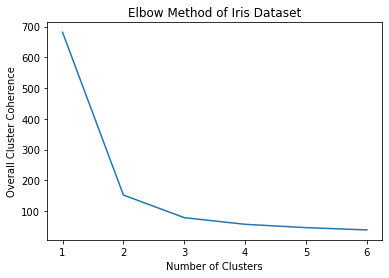

In [263]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

coherence = []

for k in range(1,7):
    kmeans = KMeans(n_clusters = k, init = 'random', max_iter = 300)
    kmeans.fit(data)
    coherence.append(kmeans.inertia_)
    
%matplotlib inline
x = np.linspace(1,6,6)
y = coherence
plt.plot(x,y)
plt.title("Elbow Method of Iris Dataset")
plt.xlabel("Number of Clusters")
plt.ylabel("Overall Cluster Coherence")
plt.show()

#### Cluster Choice
The optimal amount of clusters for a given dataset as determined by the elbow method is given by the value of k where the last noticible elbow appears on the plot. As you can see, the last notable elbow appears at k = 3. Therefore, 3 is the optimal amount of clusters to use for this dataset. Anything over 3 clusters would overfit the data and not generate very useful classifications of the data.

In [264]:
# Implementing sklearn.cluster.KMeans on Iris
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300).fit(data)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [265]:
# Implementing my kmeans clustering on Iris
kmeans2 = KMean_dadson(n_clusters = 3, max_iter = 300)
print(kmeans2(data)[0])
print(kmeans2(data)[1])

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [266]:
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Contingency Table for measuring accuracy

For this I used sklearn.metrics.cluser.pair_confusion_matrix to determine the confusion matrix from my implementation of the K-means model to the target values from the iris dataset.

In [267]:
# import the contingency table from sklearn.metrics.cluster
from sklearn.metrics.cluster import pair_confusion_matrix
predicted = kmeans2(data)[1]
actual = target
print(pair_confusion_matrix(predicted,actual))

[[10264  1490]
 [ 4736  5860]]


## Conclusion

In conclusion, my implementation of the K-means algorithm did not work all that well in clustering the data points. This can be seen by the non-zero values on the off diagnonal in the confusion matrix. 

Although, as seen in the implementation of my clustering algorithm on the iris dataset as compared to the actual target values, the clusters seem to pair well with the target values generated by the iris dataset.

There are a few reasons why the clustering may not perform extremely well. First, in K-means clustering the indexes of the clusters do not necessarily hold valuable information other than what groupings the data belong to. For example, a value of 1 in one clustering does not necessarily hold true for a value of 1 in another clustering. If I were to do this again, I would want to take that into account in my code. Additionally, selecting the starting centroids at random may not produce as good as results, whereas using a k-means++ initialization scheme to initialize the points may generate much better results and converge much faster.